c:\Users\kaan.gurgen\Anaconda3\envs\ucyedi\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  """


Original:


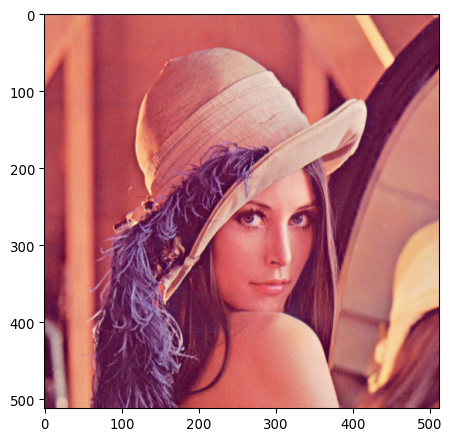

In [2]:
import imageio
import imgaug as ia
%matplotlib inline

image = imageio.imread("https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png")

print("Original:")
ia.imshow(image)

Augmented:


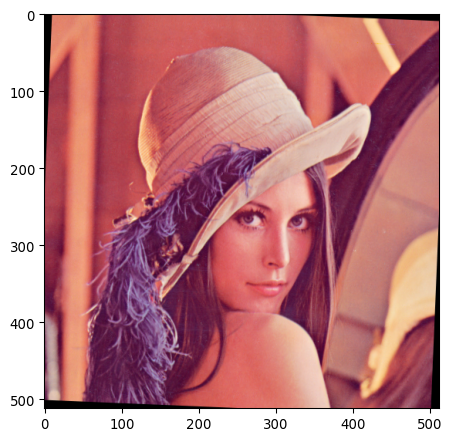

In [3]:
from imgaug import augmenters as iaa
ia.seed(4)

rotate = iaa.Affine(rotate=(-25, 25))
image_aug = rotate(image=image)

print("Augmented:")
ia.imshow(image_aug)

Augmented batch:


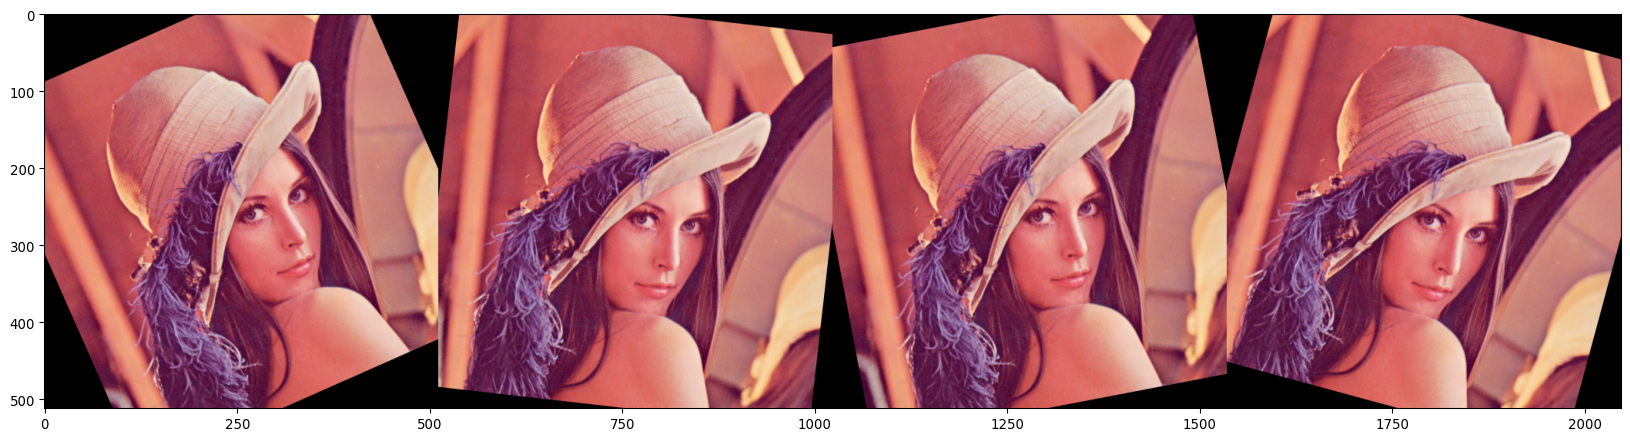

In [4]:
import numpy as np

images = [image, image, image, image]
images_aug = rotate(images=images)

print("Augmented batch:")
ia.imshow(np.hstack(images_aug))

Augmented:


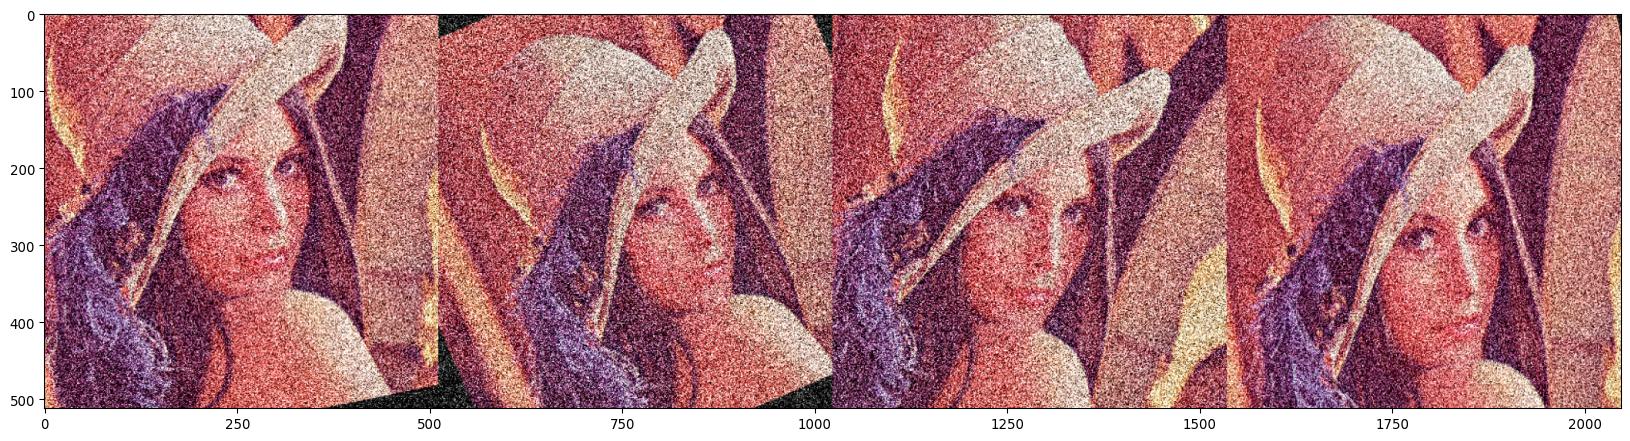

In [5]:
seq = iaa.Sequential([
    iaa.Affine(rotate=(-25, 25)),
    iaa.AdditiveGaussianNoise(scale=(100, 60)),
    iaa.Crop(percent=(0, 0.2))
])

images_aug = seq(images=images)

print("Augmented:")
ia.imshow(np.hstack(images_aug))

Augmented:


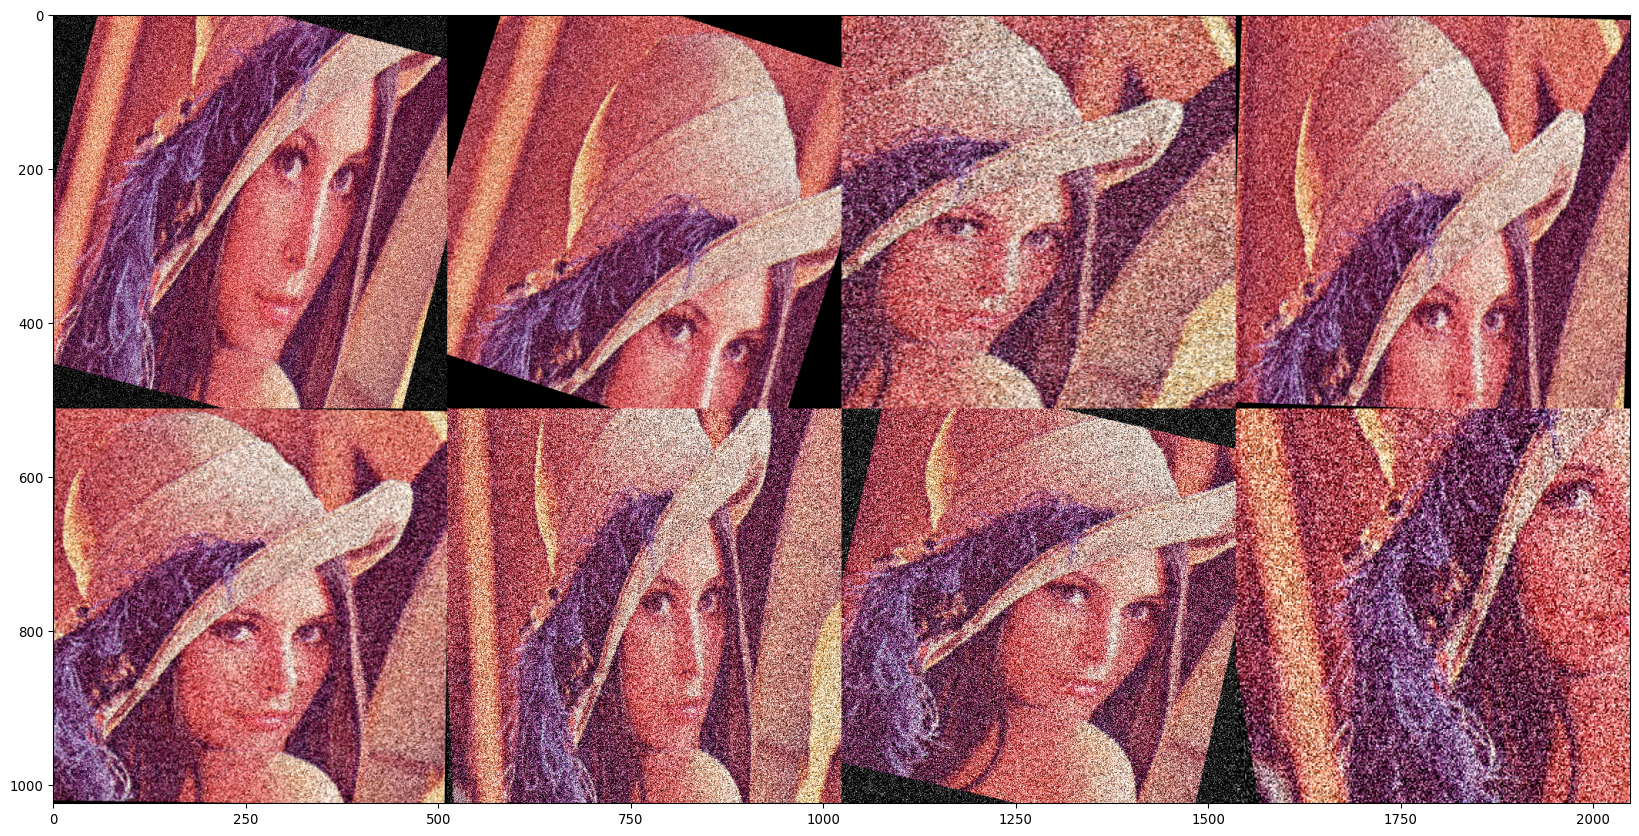

In [6]:
seq = iaa.Sequential([
    iaa.Affine(rotate=(-25, 25)),
    iaa.AdditiveGaussianNoise(scale=(30, 90)),
    iaa.Crop(percent=(0, 0.4))
], random_order=True)

images_aug = [seq(image=image) for _ in range(8)]

print("Augmented:")
ia.imshow(ia.draw_grid(images_aug, cols=4, rows=2))